# Project Description

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

## Initialization

In [ ]:
# Loading all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

## Load data

In [50]:
# Load the data files into different DataFrames
calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')

## Prepare the data

The data for this project is split into several tables. Explore each one to get an initial understanding of the data.

## Plans

In [51]:
# Print the general/summary information about the plans' DataFrame
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [52]:
# Print a sample of data for plans
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

**Code Comments: This data contains 2 rows and 8 columns. I see all the column data types are appropriate and there are no null values within either row. The 2 rows represent the 2 plans (surf and ultimate) and all the columns provide information regarding the plans as listed within the task prompt. I renamed 'usd_monthly_pay' to 'usd_monthly_fee'.  All columns have appropriate data types, the column names are lowercase and without spaces etc.**

## Fix data

In [53]:
plans.rename(columns={'usd_monthly_pay':'usd_monthly_fee','plan_name':'plan', 'mb_per_month_included': 'gb_per_month_included'}, inplace = True)
plans['gb_per_month_included'] = plans['gb_per_month_included'] / 1024
plans

,messages_included,gb_per_month_included,minutes_included,usd_monthly_fee,usd_per_gb,usd_per_message,usd_per_minute,plan
0,50,15.0,500,20,10,0.03,0.03,surf
1,1000,30.0,3000,70,7,0.01,0.01,ultimate


## Enrich data

**Code Comments: In order to make it easier for later calculations, I converted the mb_per_month_included from MB to BG by dividing by 1024 and then renamed the column to reflect the change.**

## Users

In [54]:
# Print the general/summary information about the users' DataFrame
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [55]:
# Print a sample of data for users
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

**Code Comments: This dataset originally contains 8 columns and 500 rows. All the columns have 0 non-null values except for churn_date, which only has 34 non-null values meaning that 466 values are NaN. One issue I found was that columns reg_date and churn_date should both be DD-MM-YY however, here they are YYYY-MM-DD. Also, the city column ideally should just be just the city but here it includes the state and country. This should be called 'residence' or 'address'. I will not change the column name however, the country is mispelled as MSA instead of USA, which needs to be corrected. Outside of these, I do not see anything else wrong within the data.**

### Fix Data

[Fix obvious issues with the data given the initial observations.]

In [56]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format = '%Y-%m-%d').dt.strftime('%d-%m-%y')
users['churn_date'] = pd.to_datetime(users['churn_date'], format = '%Y-%m-%d').dt.strftime('%d-%m-%y')
users['city'] = users['city'].str.replace(' MSA', ', USA')
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


### Enrich Data

[Add additional factors to the data if you believe they might be useful.]

In [57]:
users['state'] = users['city'].str.split(',').str[1]
users['state'] = users['state'].str.lstrip()
users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,state
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA, USA",24-12-18,ultimate,NaN,GA
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA, USA",13-08-18,surf,NaN,WA
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV, USA",21-10-18,surf,NaN,NV
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK, USA",28-01-18,surf,NaN,OK
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA, USA",23-05-18,surf,NaN,WA
...,...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA, USA",04-09-18,surf,NaN,NY-NJ-PA
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA, USA",20-02-18,surf,NaN,LA
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA, USA",10-12-18,ultimate,NaN,CA
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA, USA",04-02-18,surf,NaN,NY-NJ-PA


**Code Comments: I changed the country from MSA to USA and added in a column after the state for each row. Additionally, I think it will be helpful later to distinguish each user by their state. So I created a new column for the state by splitting the "city" string at the first comma and selected the 2nd part of that string. This was the good addition I could think of to help enrich the dataset. I noticed there was a blank space at the beginning of each state so I removed that as well.**

## Calls

In [58]:
# Print the general/summary information about the calls' DataFrame
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [59]:
# Print a sample of data for calls
calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

**Code Comments: This dataset contains 4 columns with 137,735 rows in each and no null values. The only issue I see is that the call_date is in format YYYY-MM-DD. It would be better for this column to be formatted as dd,mm,yy in order to match the reg_date and churn_date in a different dataset.**

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [60]:
#calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d').dt.strftime('%d-%m-%y')
calls.info()
calls.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


### Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [61]:
calls['month'] = pd.to_datetime(calls['call_date']).dt.month
calls

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,8.52,12
1,1000_145,1000,2018-12-27,13.66,12
2,1000_247,1000,2018-12-27,14.48,12
3,1000_309,1000,2018-12-28,5.76,12
4,1000_380,1000,2018-12-30,4.22,12
...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72,11
137731,1499_200,1499,2018-10-20,10.89,10
137732,1499_201,1499,2018-09-21,8.12,9
137733,1499_202,1499,2018-10-10,0.37,10


**Code Comments: I added in a column for the month in which the call was made as this will be helpful later in the analysis. Since all records are from 2018, we don't need a year column.**

## Messages

In [62]:
# Print the general/summary information about the messages' DataFrame
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [63]:
# Print a sample of data for messages
messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

**Code Comments: This dataset contains only 3 columns but 76,051 rows. There are no null values and all data types seem correct. The only issue for consistency would be to convert the message_date to dd-mm-yy format.**

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [64]:
#messages['message_date'] = pd.to_datetime(messages['message_date'], format = '%Y-%m-%d').dt.strftime('%d-%m-%y')
messages

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
...,...,...,...
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24


### Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [65]:
messages['month'] = pd.to_datetime(messages['message_date']).dt.month
messages

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12
...,...,...,...,...
76046,1497_526,1497,2018-12-24,12
76047,1497_536,1497,2018-12-24,12
76048,1497_547,1497,2018-12-31,12
76049,1497_558,1497,2018-12-24,12


**Code Comments: I added in a new column for message month as it will be helpful for future analysis.**

## Internet

In [66]:
# Print the general/summary information about the internet DataFrame
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [67]:
# Print a sample of data for the internet traffic
internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

**Code Comments: This dataset has 4 columns with 104,825 rows and 0 null values. The data types seem correct and there is no issues here except to change the session_date to the appropriate dd-mm-yy format.**

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [68]:
#internet['session_date'] = pd.to_datetime(internet['session_date'], format = '%Y-%m-%d').dt.strftime('%d-%m-%y')
internet

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00


### Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [69]:
internet['month'] = pd.to_datetime(internet['session_date']).dt.month
internet

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12
...,...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06,10
104821,1499_216,1499,2018-12-30,304.72,12
104822,1499_217,1499,2018-09-22,292.75,9
104823,1499_218,1499,2018-12-07,0.00,12


**Code Comments: I added in a usage_month column for future analysis**

## Study plan conditions

[It is critical to understand how the plans work, how users are charged based on their plan subscription. So, we suggest printing out the plan information to view their conditions once again.]

In [70]:
# Print out the plan conditions and make sure they are clear for you
plans

,messages_included,gb_per_month_included,minutes_included,usd_monthly_fee,usd_per_gb,usd_per_message,usd_per_minute,plan
0,50,15.0,500,20,10,0.03,0.03,surf
1,1000,30.0,3000,70,7,0.01,0.01,ultimate


## Aggregate data per user

[Now, as the data is clean, aggregate data per user per period in order to have just one record per user per period. It should ease the further analysis a lot.]

In [71]:
# Calculate the number of calls made by each user per month. Save the result.
calls_per_month = calls.groupby(['user_id','month']).size().reset_index(name = 'total_calls')
calls_per_month

,user_id,month,total_calls
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
...,...,...,...
2253,1498,12,39
2254,1499,9,41
2255,1499,10,53
2256,1499,11,45


In [72]:
# Calculate the amount of minutes spent by each user per month. Save the result.
minutes_per_month = calls.groupby(['user_id', 'month'])['duration'].sum().reset_index(name = 'total_minutes')
minutes_per_month

,user_id,month,total_minutes
0,1000,12,116.83
1,1001,8,171.14
2,1001,9,297.69
3,1001,10,374.11
4,1001,11,404.59
...,...,...,...
2253,1498,12,324.77
2254,1499,9,330.37
2255,1499,10,363.28
2256,1499,11,288.56


In [73]:
# Calculate the number of messages sent by each user per month. Save the result.
messages_per_month = messages.groupby(['user_id', 'month'])['message_date'].count().reset_index(name = 'total_messages')
messages_per_month

,user_id,month,total_messages
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [74]:
# Calculate the volume of internet traffic used by each user per month. Save the result.
internet_volume_per_month = internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index(name = 'total_mb_used')
internet_volume_per_month['total_gb_used'] = np.ceil(internet_volume_per_month['total_mb_used'] / 1024)
internet_volume_per_month

,user_id,month,total_mb_used,total_gb_used
0,1000,12,1901.47,2.0
1,1001,8,6919.15,7.0
2,1001,9,13314.82,14.0
3,1001,10,22330.49,22.0
4,1001,11,18504.30,19.0
...,...,...,...,...
2272,1498,12,23137.69,23.0
2273,1499,9,12984.76,13.0
2274,1499,10,19492.43,20.0
2275,1499,11,16813.83,17.0


[Put the aggregate data together into one DataFrame so that one record in it would represent what an unique user consumed in a given month.]

In [75]:
# Merge the data for calls, minutes, messages, internet based on user_id and month
user_data_per_month = calls_per_month.merge(minutes_per_month)
user_data_per_month = user_data_per_month.merge(messages_per_month)
user_data_per_month = user_data_per_month.merge(internet_volume_per_month)
user_data_per_month

,user_id,month,total_calls,total_minutes,total_messages,total_mb_used,total_gb_used
0,1000,12,16,116.83,11,1901.47,2.0
1,1001,8,27,171.14,30,6919.15,7.0
2,1001,9,49,297.69,44,13314.82,14.0
3,1001,10,65,374.11,53,22330.49,22.0
4,1001,11,64,404.59,36,18504.30,19.0
...,...,...,...,...,...,...,...
1754,1496,9,52,389.94,21,16389.27,17.0
1755,1496,10,46,301.16,18,14287.36,14.0
1756,1496,11,39,291.88,13,8547.36,9.0
1757,1496,12,40,278.61,11,16438.99,17.0


In [76]:
# Add the plan information
users_modified = users[['user_id', 'plan']]
full_user_data = user_data_per_month.merge(users_modified)
full_user_data = full_user_data.drop(columns = ['total_mb_used'])
full_user_data = full_user_data.merge(plans)

**Code Comments: In order to build a dataset that included all necessary information per user I did the following:** 
1. I went through the 3 datasets (calls, messages, internet) and I grouped each one by user_id and month and then for each dataset I performed an aggregation function such as size, count, sum on the appropriate columns within each dataset in order to calculate the total calls per month, total minutes per month, total messages per month and total mb used per month broken down by each user.
2. Since these 4 new columns were stored in 4 different datasets, I used the merge function multiple times to compile all the data into 1 dataset matching on the user_id and month (I didn't need to specify since Python was able to recognize it automatically, which is awesome). I called this new dataset user_data_per_month
3. Next I needed to add in the plan information. I did this in 2 steps. First, I modified the users df to only include the user_id and the plan columns and merged this with the user_data_per_month to create a new dataset called full_user_data. Secondly, I merged the plans df in here on plan, to include all the plan data for both surf and ultimate. I understand this makes the df very big and I can use other approaches here but I kind of liked seeing all the information for every record in this form.

[Calculate the monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan). N.B. This might not be as trivial as just a couple of lines given the plan conditions! So, it's okay to spend some time on it.]

In [77]:
# Calculate the monthly revenue for each user
full_user_data['extra_minutes'] = (full_user_data['total_minutes'] - full_user_data['minutes_included']).clip(0)
full_user_data['extra_messages'] = (full_user_data['total_messages'] - full_user_data['messages_included']).clip(0)
full_user_data['extra_data'] = (full_user_data['total_gb_used'] - full_user_data['gb_per_month_included']).clip(0)

full_user_data['cost_extra_minutes'] = full_user_data['extra_minutes'] * full_user_data['usd_per_minute']
full_user_data['cost_extra_messages'] = full_user_data['extra_messages'] * full_user_data['usd_per_message']
full_user_data['cost_extra_data'] = full_user_data['extra_data'] * full_user_data['usd_per_gb']
full_user_data['total_cost'] = full_user_data['usd_monthly_fee'] + full_user_data['cost_extra_minutes'] + full_user_data['cost_extra_messages'] + full_user_data['cost_extra_data']

full_user_data = full_user_data[['user_id', 'month', 'total_calls', 'total_minutes', 'total_messages', 'total_gb_used', 'extra_minutes', 'extra_messages', 'extra_data', 'total_cost', 'plan']]
full_user_data

,user_id,month,total_calls,total_minutes,total_messages,total_gb_used,extra_minutes,extra_messages,extra_data,total_cost,plan
0,1000,12,16,116.83,11,2.0,0.0,0,0.0,70.0,ultimate
1,1006,11,2,9.32,15,3.0,0.0,0,0.0,70.0,ultimate
2,1006,12,9,54.79,139,32.0,0.0,0,2.0,84.0,ultimate
3,1008,10,71,450.21,21,17.0,0.0,0,0.0,70.0,ultimate
4,1008,11,63,422.81,37,24.0,0.0,0,0.0,70.0,ultimate
...,...,...,...,...,...,...,...,...,...,...,...
1754,1496,8,18,114.62,2,9.0,0.0,0,0.0,20.0,surf
1755,1496,9,52,389.94,21,17.0,0.0,0,2.0,40.0,surf
1756,1496,10,46,301.16,18,14.0,0.0,0,0.0,20.0,surf
1757,1496,11,39,291.88,13,9.0,0.0,0,0.0,20.0,surf


**Code Comments: In order to calculate the monthly revenue I took the following steps:**
1. I created 3 new columns called extra_minutes, extra_messages, extra_data, which was basically taking the total minutes, messages and data and subtracting the allowed minutes, messages and data per plan for each user. Since many users stayed under the limit, I had to use the function clip() to stop the values from decreasing below 0. This way all negative values would become 0. As such, now we have data for each user and how much extra did they use for all 3 categories.
2. Next, I created 3 more new columns in order to calculate the cost of each of those previous 3 columns by multipling the values in the extra columns to the columns of usd_per_minute, usd_per_message, usd_per_gb. This way we had the data of each user in terms of how much extra they were spending in each of the 3 categories
3. Finally, I created a column called total cost to add up all 3 of theses extra cost columns with the initial cost of plan (usd_monthly_fee). This finally gave us the total cost of each user per month including all additional charges and base cost of their package. I modified the dataset to only include relevant columns.

## Study user behaviour

[Calculate some useful descriptive statistics for the aggregated and merged data, which typically reveal an overall picture captured by the data. Draw useful plots to help the understanding. Given that the main task is to compare the plans and decide on which one is more profitable, the statistics and the plots should be calculated on a per-plan basis.]

[There are relevant hints in the comments for Calls but they are not provided for Messages and Internet though the principle of statistical study is the same for them as for Calls.]

### Calls

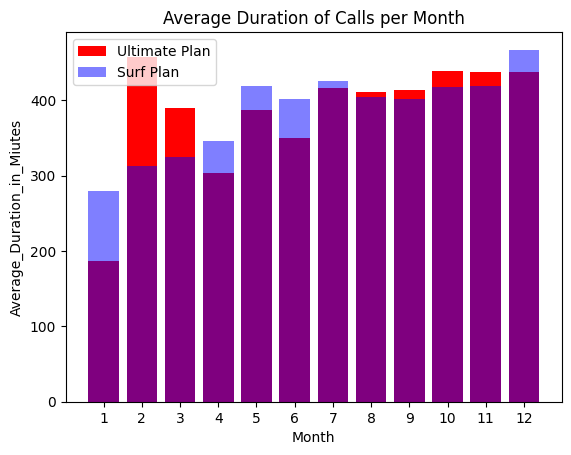

In [78]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.
ultimate_data = full_user_data[full_user_data['plan'] == 'ultimate']
ultimate_calls = round(ultimate_data.groupby('month')['total_minutes'].mean().reset_index(name = 'ultimate_avg_mins'))

surf_data = full_user_data[full_user_data['plan'] == 'surf']
surf_calls = round(surf_data.groupby('month')['total_minutes'].mean().reset_index(name = 'surf_avg_mins'))
average_mins_per_plan = ultimate_calls.merge(surf_calls)
average_mins_per_plan

plt.bar(average_mins_per_plan['month'], average_mins_per_plan['ultimate_avg_mins'], label = 'Ultimate Plan', color = 'red')
plt.bar(average_mins_per_plan['month'], average_mins_per_plan['surf_avg_mins'], label = 'Surf Plan', alpha = 0.5, color = 'blue')
plt.xlabel('Month')
plt.ylabel('Average_Duration_in_Miutes')
plt.title('Average Duration of Calls per Month')
plt.xticks(range(1,13))
plt.legend()
plt.show()

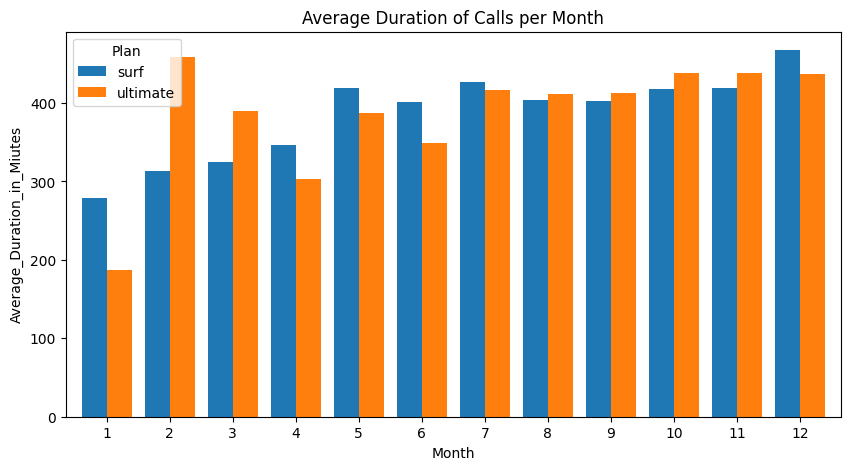

In [79]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.
avg_duration_per_plan = full_user_data.groupby(['month', 'plan'])['total_minutes'].mean().unstack()

avg_duration_per_plan.plot(kind = 'bar', figsize=(10, 5), width=0.8)
plt.xlabel('Month')
plt.ylabel('Average_Duration_in_Miutes')
plt.title('Average Duration of Calls per Month')
plt.legend(title='Plan')
plt.xticks(rotation=0)
plt.show()

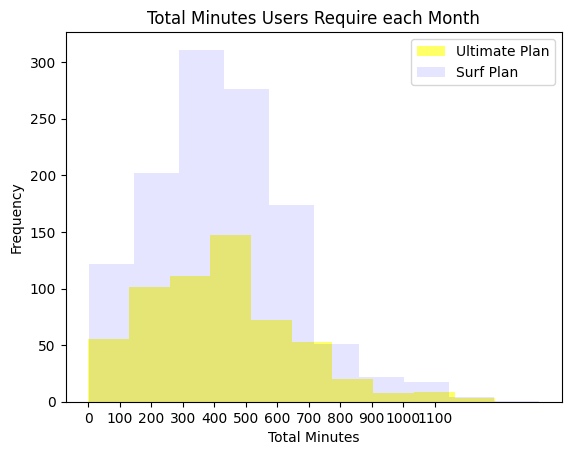

In [80]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.
ultimate_data = full_user_data[full_user_data['plan'] == 'ultimate']
surf_data = full_user_data[full_user_data['plan'] == 'surf']

plt.hist(ultimate_data['total_minutes'], bins=10, alpha = 0.6, label='Ultimate Plan', color='yellow')
plt.hist(surf_data['total_minutes'], bins=10, alpha = 0.1, label='Surf Plan', color='blue')

plt.xlabel('Total Minutes')
plt.ylabel('Frequency')
plt.xticks(np.arange(0,1200,100))
plt.title('Total Minutes Users Require each Month')
plt.legend()
plt.show()


[Calculate the mean and the variable of the call duration to reason on whether users on the different plans have different behaviours for their calls.]

In [81]:
# Calculate the mean and the variance of the monthly call duration
mean_var_per_plan = full_user_data.groupby(['month', 'plan'])['total_minutes'].agg(['mean', 'var']).unstack()
mean_var_per_plan

mean                       var              
plan         surf    ultimate          surf      ultimate
month                                                    
1      278.850000  187.453333           NaN  22376.587433
2      313.240000  458.316000  90934.192950  59004.345680
3      324.985625  389.648571  38165.741733  53331.785381
4      346.206286  303.301250  56226.026948  36280.868692
5      418.675283  387.340952  55324.752668  49426.122669
6      401.525429  349.536757  43182.147964  35334.114628
7      426.454382  415.912979  57923.159823  72298.842704
8      404.183950  411.488246  48244.970507  52808.925215
9      402.010068  413.126479  41696.916513  57056.019895
10     417.628785  438.700795  46581.795937  51267.766909
11     418.942202  438.496569  44585.274097  58637.117613
12     467.447073  436.801040  55667.000587  59435.742379

Text(0, 0.5, 'Total Call Duration in Minutes')

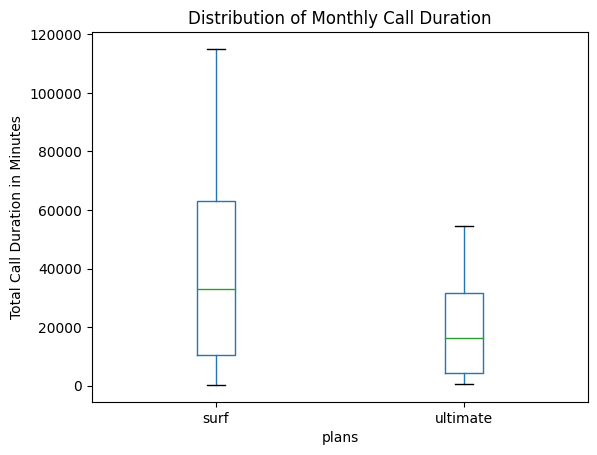

In [82]:
# Plot a boxplot to visualize the distribution of the monthly call duration
total_mins_per_plan = full_user_data.groupby(['month', 'plan'])['total_minutes'].sum().unstack()
total_mins_per_plan.plot(kind = 'box')
plt.title('Distribution of Monthly Call Duration')
plt.xlabel('plans')
plt.ylabel('Total Call Duration in Minutes')

[Formulate conclusions on how the users behave in terms of calling. Is their behaviour different between the plans?]

 **Code Comments: Based on the graphs above there are 2 main things to look for here. Firstly, the average duration for both plans clearly increases over time from January to December with December being the peak for both plans. Secondly, there really is no significant difference between the average duration of calls per month for both plans. For some months, Surf has a greater duration while for other Ultimate has a higher duration. There is no pattern in which a plan achieves greater duration during certain months over the other plan. The key takeaway here is that users (for both plans) tend to make longer lasting calls as the year goes forward. The average length of a call by a user is not dependent on what plan that user has.**
 
**From the histogram we can see how many minutes the users of both plans require each month. Majority of the users for most plan require less than 125 minutes, while a good amount of users require between 125 and 475 minutes and a small subset of users require more than 500 minutes. So a good analysis here would be that a lot of users with Ultimate plan are not even reaching the 500 minute limit set by the Surf plan. So it is safe to say that set of users have not chosen the Ultimate plan for its 3000 minutes of calling. They must have chosen the Ultimate plan for a different reason.**

### Messages

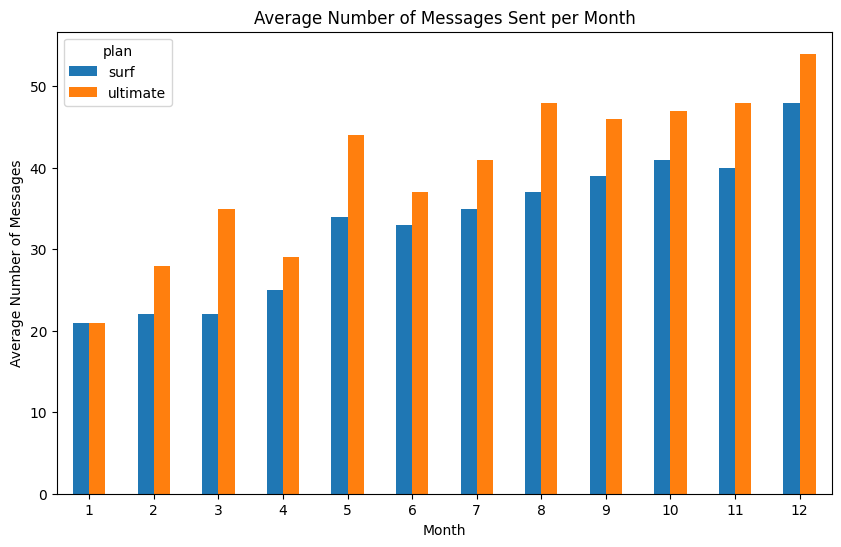

In [83]:
# Compare the number of messages users of each plan tend to send each month
num_of_messages = round(full_user_data.groupby(['month', 'plan'])['total_messages'].mean().unstack())
num_of_messages.plot(kind = 'bar', figsize = (10,6), xlabel = 'Month', ylabel = 'Average Number of Messages', 
                     title = 'Average Number of Messages Sent per Month', rot = 0)
plt.show()

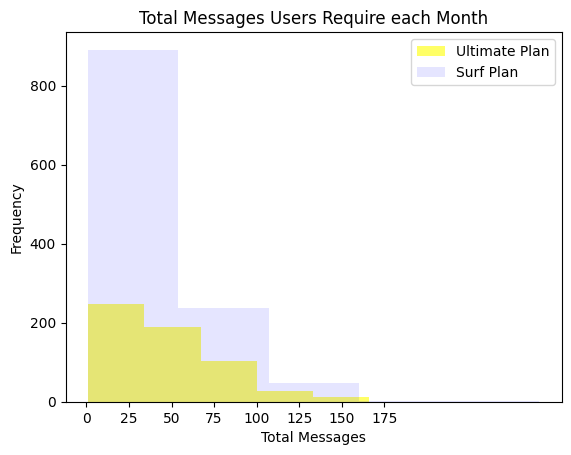

In [84]:
ultimate_data = full_user_data[full_user_data['plan'] == 'ultimate']
surf_data = full_user_data[full_user_data['plan'] == 'surf']

plt.hist(ultimate_data['total_messages'], bins=5, alpha = 0.6, label='Ultimate Plan', color='yellow')
plt.hist(surf_data['total_messages'], bins=5, alpha = 0.1, label='Surf Plan', color='blue')

plt.xlabel('Total Messages')
plt.ylabel('Frequency')
plt.xticks(np.arange(0,200,25))
plt.title('Total Messages Users Require each Month')
plt.legend()
plt.show()


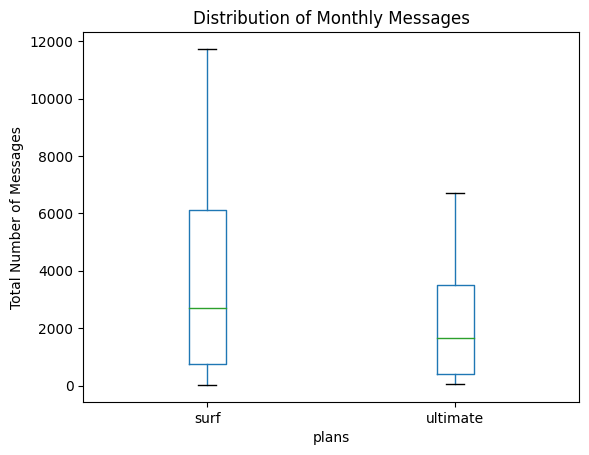

In [85]:
total_mesgs_per_plan = full_user_data.groupby(['month', 'plan'])['total_messages'].sum().unstack()
total_mesgs_per_plan.plot(kind = 'box')
plt.title('Distribution of Monthly Messages')
plt.xlabel('plans')
plt.ylabel('Total Number of Messages')
plt.show()

[Formulate conclusions on how the users behave in terms of messaging. Is their behaviour different between the plans?]

**Code Comments: Based on the graphs above, we can see a couple of things. Firstly, there is a consistency in the increase of messages sent over the year from January to December as previously seen with the number of calls. In other words, the Average Number of Messages Sent increases from Jan to Dec with users sending most messages in December. Unlike that with the calls data, there is a clear distinction that the users of Ultimate Plan send a greater number of messages on average per user per month than users of the Surf Plan. This means Surf Plan users probably take into consideration how many messages they are allowed to send per month, more than users of Ultimate Plan.** 

**Nevertheless, since there is a much greater number of Surf Plan users than Ultimate users, we can see that as a whole the users of Surf Plan send a lot more messages than the users of Ultimate Plan. It is also clear in the boxplot distribution that the total number of messages sent by users of Surf far exceeds that of users of Ultimate and this is a direct consequence of the total number of users of Surf to that of Ultimate rather than the amount of messages sent on average by individual users.**

**In conclusion, there is truly not much difference in the behaviour of users between the plans because on average the users of both plans show similar habits of messaging per month with the only difference being that surf users consistently send less messages on average than ultimate users.**

### Internet

plan        surf   ultimate
month                      
1       8.000000   7.333333
2       9.400000  17.400000
3      12.625000  23.857143
4      12.085714  14.500000
5      15.056604  17.238095
6      15.771429  15.513514
7      16.808989  16.638298
8      17.252101  18.000000
9      16.612245  16.464789
10     17.524862  17.636364
11     16.389908  17.401961
12     18.089431  18.352000


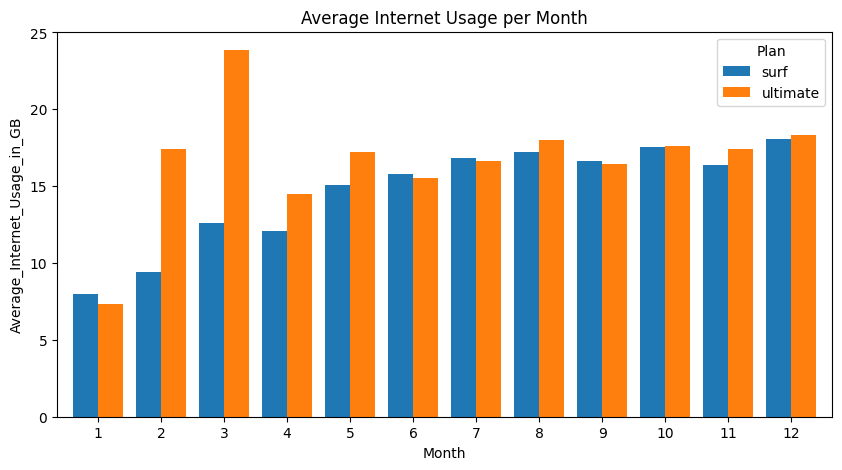

In [86]:
# Compare the amount of internet traffic consumed by users per plan
avg_internet_usage_per_plan = full_user_data.groupby(['month', 'plan'])['total_gb_used'].mean().unstack()
print(avg_internet_usage_per_plan)

avg_internet_usage_per_plan.plot(kind = 'bar', figsize=(10, 5), width=0.8)
plt.xlabel('Month')
plt.ylabel('Average_Internet_Usage_in_GB')
plt.title('Average Internet Usage per Month')
plt.legend(title='Plan')
plt.xticks(rotation=0)
plt.show()

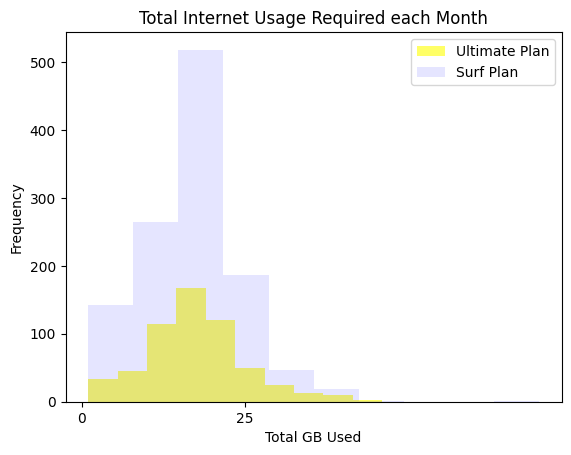

In [87]:
ultimate_data = full_user_data[full_user_data['plan'] == 'ultimate']
surf_data = full_user_data[full_user_data['plan'] == 'surf']

plt.hist(ultimate_data['total_gb_used'], bins=10, alpha = 0.6, label='Ultimate Plan', color='yellow')
plt.hist(surf_data['total_gb_used'], bins=10, alpha = 0.1, label='Surf Plan', color='blue')

plt.xlabel('Total GB Used')
plt.ylabel('Frequency')
plt.xticks(np.arange(0,50,25))
plt.title('Total Internet Usage Required each Month')
plt.legend()
plt.show()

Text(0, 0.5, 'Total Internet Usage in GB')

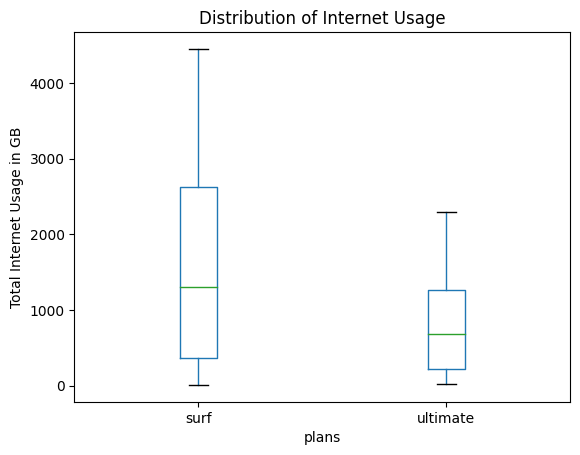

In [88]:
total_GB_per_plan = full_user_data.groupby(['month', 'plan'])['total_gb_used'].sum().unstack()
total_GB_per_plan.plot(kind = 'box')
plt.title('Distribution of Internet Usage')
plt.xlabel('plans')
plt.ylabel('Total Internet Usage in GB')

[Formulate conclusions on how the users tend to consume the internet traffic? Is their behaviour different between the plans?]

**Code Comments: From the graphs above, we can make the conclusions that the amount of Internet usage by users of both plans on average per month is extremely similar with Ulimate users generally using a bit more internet but not always. Additionally, the same pattern as calls and messages is seen here that internet usage increases gradually from January to December. Since Surf Plan users is a lot more, the total internet usage required per plan is greater for Surf than for Ultimate. As such it is easier to make the claim that there is not much difference in the internet usage behaviours of the average users over each month between the two plans. If we wanted to compare outliers, we can see many differences but that does not help us to generalize a comparison between the two plans as we have done here.**

## Revenue

[Likewise you have studied the user behaviour, statistically describe the revenue between the plans.]

In [89]:
full_user_data

,user_id,month,total_calls,total_minutes,total_messages,total_gb_used,extra_minutes,extra_messages,extra_data,total_cost,plan
0,1000,12,16,116.83,11,2.0,0.0,0,0.0,70.0,ultimate
1,1006,11,2,9.32,15,3.0,0.0,0,0.0,70.0,ultimate
2,1006,12,9,54.79,139,32.0,0.0,0,2.0,84.0,ultimate
3,1008,10,71,450.21,21,17.0,0.0,0,0.0,70.0,ultimate
4,1008,11,63,422.81,37,24.0,0.0,0,0.0,70.0,ultimate
...,...,...,...,...,...,...,...,...,...,...,...
1754,1496,8,18,114.62,2,9.0,0.0,0,0.0,20.0,surf
1755,1496,9,52,389.94,21,17.0,0.0,0,2.0,40.0,surf
1756,1496,10,46,301.16,18,14.0,0.0,0,0.0,20.0,surf
1757,1496,11,39,291.88,13,9.0,0.0,0,0.0,20.0,surf


plan        surf   ultimate
month                      
1      20.000000  70.000000
2      23.662120  70.000000
3      38.323500  78.000000
4      40.262346  73.062500
5      50.364445  71.000000
6      51.750469  72.081081
7      61.354021  72.382979
8      64.015463  72.456140
9      56.854326  71.380282
10     64.978578  72.147727
11     56.716289  72.127451
12     68.283588  72.744000


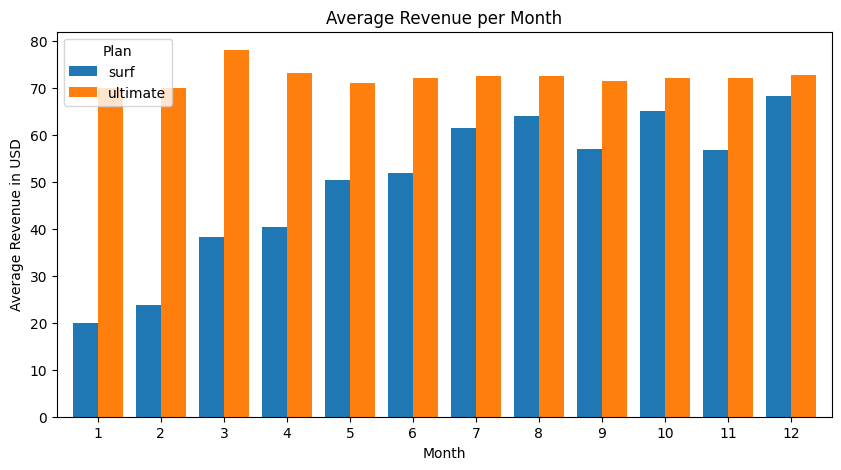

In [90]:
avg_revenue_per_plan = full_user_data.groupby(['month','plan'])['total_cost'].mean().unstack()
print(avg_revenue_per_plan)

avg_revenue_per_plan.plot(kind = 'bar', figsize=(10, 5), width=0.8)
plt.xlabel('Month')
plt.ylabel('Average Revenue in USD')
plt.title('Average Revenue per Month')
plt.legend(title='Plan')
plt.xticks(rotation=0)
plt.show()

plan         surf  ultimate
month                      
1         20.0000     210.0
2        118.3106     350.0
3        613.1760     546.0
4       1409.1821    1169.0
5       2669.3156    1491.0
6       3622.5328    2667.0
7       5460.5079    3402.0
8       7617.8401    4130.0
9       8357.5859    5068.0
10     11761.1226    6349.0
11     12364.1509    7357.0
12     16797.7626    9093.0


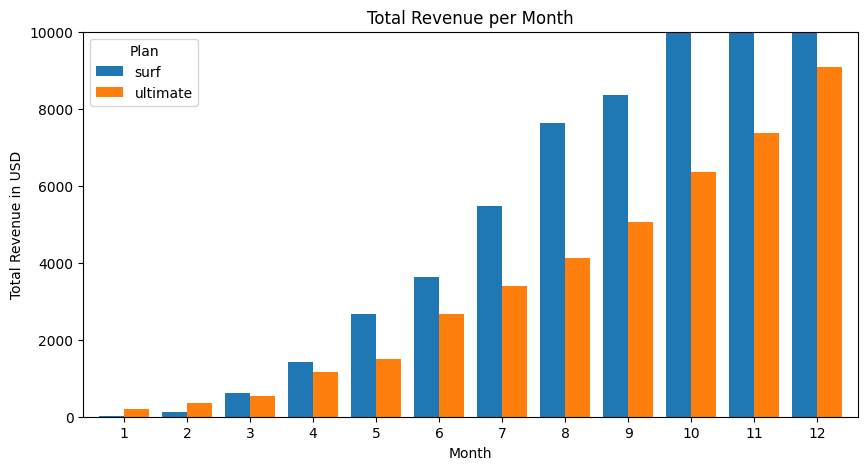

In [91]:
revenue_per_plan = full_user_data.groupby(['month','plan'])['total_cost'].sum().unstack()
print(revenue_per_plan)

revenue_per_plan.plot(kind = 'bar', figsize=(10, 5), width=0.8)

plt.xlabel('Month')
plt.ylabel('Total Revenue in USD')
plt.title('Total Revenue per Month')
plt.legend(title='Plan')
plt.xticks(rotation=0)
plt.ylim(0, 10000)
plt.show()

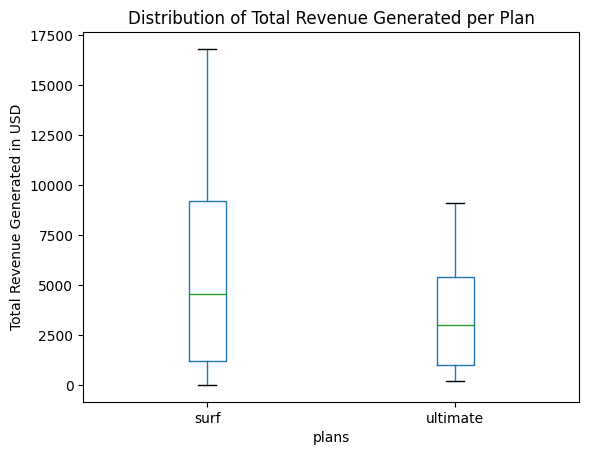

In [92]:
revenue = full_user_data.groupby(['month', 'plan'])['total_cost'].sum().unstack()
revenue.plot(kind = 'box')
plt.title('Distribution of Total Revenue Generated per Plan')
plt.xlabel('plans')
plt.ylabel('Total Revenue Generated in USD')
plt.show()

[Formulate conclusions about how the revenue differs between the plans.]

**Code Comments: In the first graph we compare the average cost per plan paid by users per month. From this we can see that on an average the Ultimate Plan users are paying 70USD every single month and this is the cost of the plan at its base rate. This means that the average user is not paying any additional fees on top of the 70USD. However, for the Surf plan in January and February the average user is paying 20USD, the base cost of the plan, but as the year continues the average user is paying much more than 20USD per month. The average reaches as high as 37USD, which is 17USD more than the base rate of the plan. This metric indicates that there are many users who are paying additional costs by using more than the plan allots in either calls, messages or data.**

**In the second graph we can compare the total revenue generated per month per plan and based on the graph there are a few things to note. Firstly, the total revenue generated by the Ultimate Plan stays more or less consistent from January to October than increases significantly in November and even more in December. Conversely, revenue generated by the Surf Plan generally increases every month with greatest increase in December. Moreover, the revenue by Surf plan starts off more than 2000 USD less than that of Ultimate plan in January but by December exceeds. Specifically, Ultimate plan and Surf Plan start off at about 6000USD and under 4000 USD, respectively, in January but both in December both plans generate over 9000USD.**

**Based on the third graph, boxplot, we get a better understanding of the total revenue generated by each plan because here we can clearly see that there is a far greater difference in the minimum and maximum anmount of revenue generated by users of Surf Plan than that of the Ultimate Plan. The revenue fluctuates a lot more for Surf Plan whereas Ultimate offeres a more consistent revenue over the year. Additionally, although Surf plan generates a much less revenue than Ultimate plan at times, it also generates much more revenue than Ultimat plan at other times. So it is important to know the months in which Surf plan exceeds Ultimate plan in total revenue.**

## Test statistical hypotheses

[Test the hypothesis that the average revenue from users of the Ultimate and Surf calling plans differs.]

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

**Code Comments:**

- H0 = Average Revenue from users of both plans is the same or similar
- H1 = Average Revenue fronm users of both plans is signficantly different
- Set alpha = 0.05
- Since these are 2 independent groups we can use the ttest_ind and set equal_var = False
- Then we can calculate the p_value.
   - If p_value < alpha --> reject H0
   - If p_value > alpha --> cannot reject H0

In [ ]:
ultimate_revenue = full_user_data[full_user_data['plan'] == 'ultimate']['total_cost']
surf_revenue = full_user_data[full_user_data['plan'] == 'surf']['total_cost']

alpha = 0.05
#results = st.mannwhitneyu(ultimate_revenue, surf_revenue, alternative = 'less')
results = st.ttest_ind(ultimate_revenue, surf_revenue, equal_var = False)
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("We reject the Null Hypothesis")
else:
    print("We cannot reject the Null Hypothesis")

p-value: 8.125171576846435e-14
We reject the Null Hypothesis


**Student's Comments Post_Review:**
**I was unable to figure out why the p-value was 0.0 so I had to use the Discord chat and ask Dot/Tutors for help. To my surprise this was a very challenging task for the tutor to figure out as well but after careful study of my code, tutor Victor Camargo was somehow able to figure out the issue. Apparently, my codes in cells 1.8.1, 1.9.1 and 1.10.1 was incorrect as I unnecessarily converted the date as a string rather than keeping it as a datetime object. Somehow, this led to inaccurate calculation of the p-value in the cell above. Nevertheless, with Victor's help, I updated my code and believe this should be all correct now. Please take another look and let me know if there is still anything inaccurate. Thank you!**

In [94]:
full_user_data.groupby('plan')['total_cost'].mean()

plan
surf        60.009735
ultimate    72.248705
Name: total_cost, dtype: float64

**Student's Comments: Lets say the Null Hypothesis is the average revenue from users of both plans is the same. So the Alternate Hypothesis is that the average revenues from both plans are different. It doesn't matter which is more or less but whether they are similar or not. As such this would be considered a Two-Tailed Test. We can treat Ultimate and Surf plans as independent groups or 2 different population means and use ttest_ind with equal_var = False. Let's use alpha = 0.05 and apply the df.pvalue function. As for the results we get a pvalue > alpha and that means we reject the Null Hypothesis**

**This means that the average revenue from users of both plans is not very similar at all and this can easily be verified in the graphs above where we compared the average revenues of both plans in a bar graph. Additionally, in the line entry right above this markdown, we did a groupby plan and mean on the total cost and see the average for surf is 29USD while ultimate is 70USD.**

[Test the hypothesis that the average revenue from users in the NY-NJ area is different from that of the users from the other regions.]

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

**Student's Comments Post_Review:**

- H0 = Average Revenue from users of regions NY-NJ-PA is the same as from users of other regions
- H1 = Average Revenue fronm users of regions NY-NJ-PA is signficantly different than from users of other regions
- Set alpha = 0.05
- Since these are 2 independent groups we can use the ttest_ind and set equal_var = False
- Then we can calculate the p_value.
   - If p_value < alpha --> reject H0
   - If p_value > alpha --> cannot reject H0

In [95]:
# Test the hypotheses
users_state = users[['user_id','state']]
full_user_data = full_user_data.merge(users_state)
full_user_data

avg_tri_state_revenue = full_user_data[full_user_data['state'] == 'NY-NJ-PA']['total_cost']
avg_other_revenue = full_user_data[full_user_data['state'] != 'NY-NJ-PA']['total_cost']

alpha = 0.05
results = st.ttest_ind(avg_tri_state_revenue, avg_other_revenue, equal_var = False)
print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print("We reject the Null Hypothesis")
else:
    print("We cannot reject the Null Hypothesis")

p-value: 0.004024256220178592
We reject the Null Hypothesis


In [96]:
avg_tri_state_revenue = full_user_data[full_user_data['state'] == 'NY-NJ-PA']['total_cost']
avg_other_revenue = full_user_data[full_user_data['state'] != 'NY-NJ-PA']['total_cost']
print(avg_tri_state_revenue.mean())
print()
print(avg_other_revenue.mean())

57.685705734767026

65.23592918918919


**Code Comments: Lets take the Null Hypothesis as the average revenue from users in the NY-NJ-PA area as the same as the average revenue of users from other regions. Now lets apply the same code as in the previous lines above with alpha = 0.05 and assuming independent groups. In doing so, we get a p-value < alpha and that means that We reject the Null Hypothesis. This means that the average revenue from state NY-NJ-PA is not the same as that from other states. I printed the mean revenues of these both groups and we see that for Tri-state area we get a average of 57USD and for other areas the average is about 62USD, which may seem small but can make a big difference when working with a large set of customers.**

## General conclusion

[List your important conclusions in this final section, make sure they cover all those important decisions (assumptions) that you've made and that led you to the way you processed and analyzed the data.]

**Code Comments: Overal conclusions I would make from this project is that it is very important to understand that there is a significant difference in the base cost of Surf and Ultimate plan; nevertheless, the revenues generated from both are not very different. This goes to show that it is critical to take into account the number of users per plan in order to claim which plan is better in terms of revenue. It is clear that Ultimate provides more flexibility so there is much less additional cost to the users and as such the revenue from Ultimate plan is also about the same from month to month. Conversely, Surf Plan offers less base package so it is easier for users to go over their alloted amounts and end up paying more in additional fees on top of the base rate. Nonetheless, since the base rate is much lower, the revenue generated is highly dependent on the additional fees and users have a tendency to pay more as the year goes on. As a result the revenue generated from Surf may be very low than Ultimate in the beginning of the year but it skyrockets and exceeds that or Ultimate by the end of the year. More analysis is required if we want to make decisions regarding which is truly the better plan. There is a lot of data here that can help even analyze which plan works better in which regions of the country and this can be very useful going forward if there is options of creating a 3rd plan as well or increasing/decreasing the base/additional costs of the plans. Ultimately, it was seen that the average users tend to share their habits in terms of calling, texting, and internet usage regardless of the plans they have. Many users are okay with paying more in additional fees while maintaining a lower base package meanwhile some users would rather pay more monthly with the peace of mind that there will be no additional fees. Overall users behavior very similarly in that they tend to increase their plan usage as the year goes on with the highest usage in December and lowest in January and this is true for all categories calling, texting and internet usage irrespective of the plan the users have.**